In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
plt.rcParams['figure.dpi'] = 150

In [2]:
data = np.loadtxt('../ex1/ex1data1.txt', delimiter=',')

In [3]:
data.shape

(97, 2)

In [4]:
X = data[:,[0]]
y = data[:,[1]]

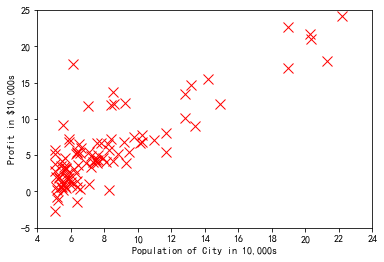

In [5]:
def plotData(X, y):
    fig = plt.figure()
    plt.plot(X, y, 'rx', markersize=10)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.xlim(4,24)
    plt.ylim(-5,25)
    plt.xticks(np.arange(4,25,2))
    plt.yticks(np.arange(-5,26,5))
    return fig,plt
fig, plt = plotData(X,y)

In [6]:
X = np.insert(X, 0, 1, axis=1)

In [7]:
def hypothesis(X, theta):
    """
    计算假设函数
    : return:预测值向量
    """
    return np.dot(X, theta)

In [8]:
def computeCost(X, y, theta):
    """
    计算代价函数
    : X:训练数据的features
    : y:训练数据的real values
    : return:J, 代价函数值
    """
    m = len(X)
    J = 1/2 * np.sum(np.square(hypothesis(X,theta) - y)) / m
    return J

In [9]:
# 测试代价函数
# 当theta = [[0], [0]]时， J=32.07
# 当theta = [[-1],[2]]时， J=54.24
theta = np.zeros((2,1))
print(computeCost(X, y, theta))
print(computeCost(X, y, [[-1], [2]]))

32.072733877455676
54.24245508201238


In [10]:
# 设置theta初始值
m = len(X)  # 获取训练数据的长度
theta = np.zeros((2, 1))  # 初始化theta
iterations = 1500  # 设置迭代次数
alpha = 0.01  # 设置learning rate，如果学习速率过大，则导数不收敛，所以要多次尝试alpha
def gradientDescent(X, y, theta, alpha, iterations):
    """
    梯度下降函数
    : X:训练数据的features
    : y:训练数据的real values
    : theta:权重
    : alpha:learning rate
    : iterations:迭代次数
    : return: theta,J_history
    """
    m = len(X)
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
#         h = hypothesis(X, theta)  # 得出假设函数的值, (m, 1)向量
        temp0 = theta[0,0] - alpha * np.sum(X.dot(theta) - y) / m
        temp1 = theta[1,0] - alpha * np.dot((X.dot(theta) - y).T, X[:,[1]])  / m          
        # 同步更新theta的值
        theta[0,0] = temp0
        theta[1,0] = temp1
#         print(theta)
        # 记录代价函数值J的历史数据
        J = computeCost(X, y, theta)
        J_history[i,0] = J
    return theta, J_history

In [11]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

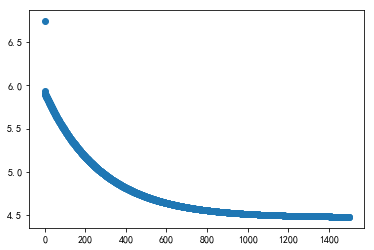

In [12]:
plt.scatter(range(len(J_history)),J_history)

预测数据

In [13]:
predict1 = np.matrix([1, 3.5]) * theta
print('For population = 35,000, we predict a profit of ', predict1[0,0]*10000)
predict1 = np.matrix([1, 7]) * theta
print('For population = 70,000, we predict a profit of ', predict1[0,0]*10000)

For population = 35,000, we predict a profit of  4519.767867701772
For population = 70,000, we predict a profit of  45342.45012944714


可视化

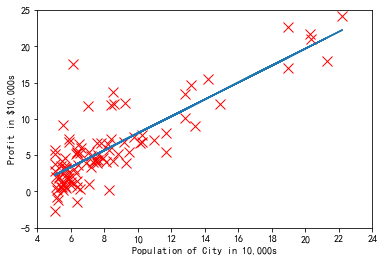

In [14]:
fig, plt2 = plotData(X, y)
plt2.plot(X[:,1], hypothesis(X, theta))

In [27]:
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J_vals[i,j] = computeCost(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

绘制三维图形

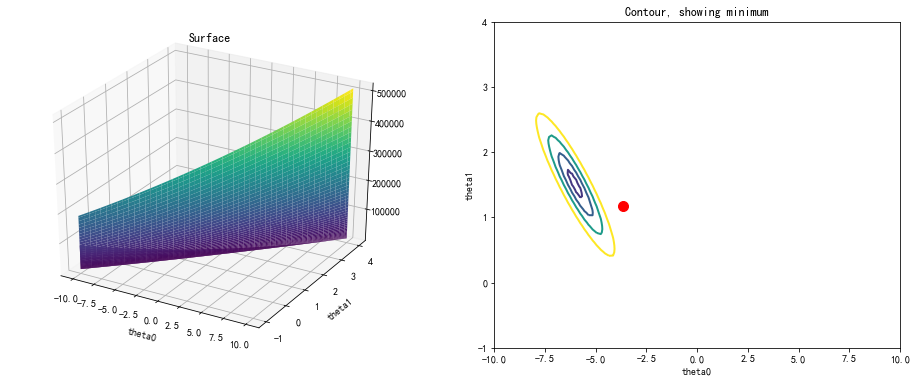

In [36]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass